# PGC AIML Core: Machine Learning
## Assessment 1 - Employee Turnover Analytics

### Tasks to Perform:

1.	Perform data quality check by checking for missing values if any.
2.	Understand what factors contributed most to employee turnover by EDA.
3.	Perform clustering of Employees who left based on their satisfaction and evaluation.
4.	Handle the left Class Imbalance using SMOTE technique.
5.	Perform k-fold cross-validation model training and evaluate performance. 
6.	Identify the best model and justify the evaluation metrics used. 
7.	Suggest various retention strategies for targeted employees.
oyees.

---------------------------------------------------------------------------------------------------------------------------

### Importing required Libraries and Data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report

from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix

In [2]:
%matplotlib inline

df = pd.read_excel("hr_comma_sep.xlsx")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


---------------------------------------------------------------------------------------------------------------------------

### Task 1.	Perform data quality check by checking for missing values if any.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


#### No missing values present in this dataset.

In [5]:
df.isnull().sum(axis=0)

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

---------------------------------------------------------------------------------------------------------------------------
### Task 2.	Understand what factors contributed most to employee turnover by EDA.

##### 2.1. Draw a heatmap of the Correlation Matrix between all numerical features/columns in the data.

In [6]:
df_numeric = df.drop(['sales','salary'],axis = 1)

df_numeric.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


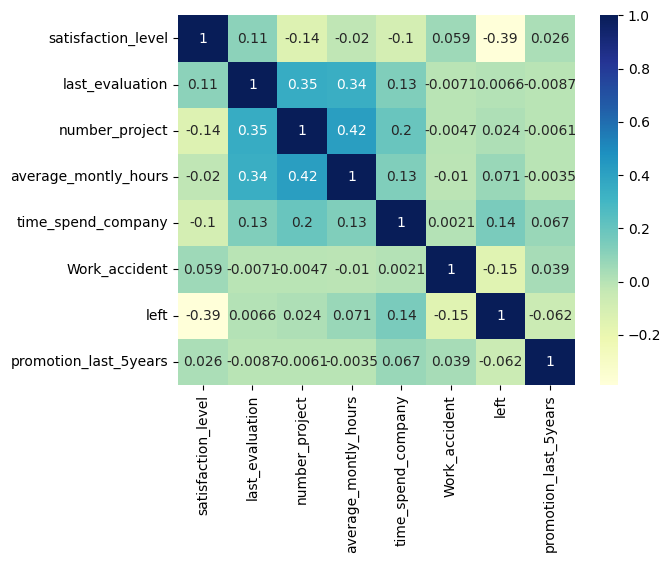

In [7]:
dataplot = sns.heatmap(df_numeric.corr(), cmap="YlGnBu", annot=True)  
plt.show() 

Last Evaluation, Number of Projects, Average Monthly Hours, Time Spent in Company are the columns which are highly correlated to each other

##### 2.2. Draw the distribution plot of :- 
    Employee Satisfaction (use column satisfaction_level)
    Employee Evaluation (use column last_evaluation)
    Employee Average Monthly Hours (use column average_montly_hours)

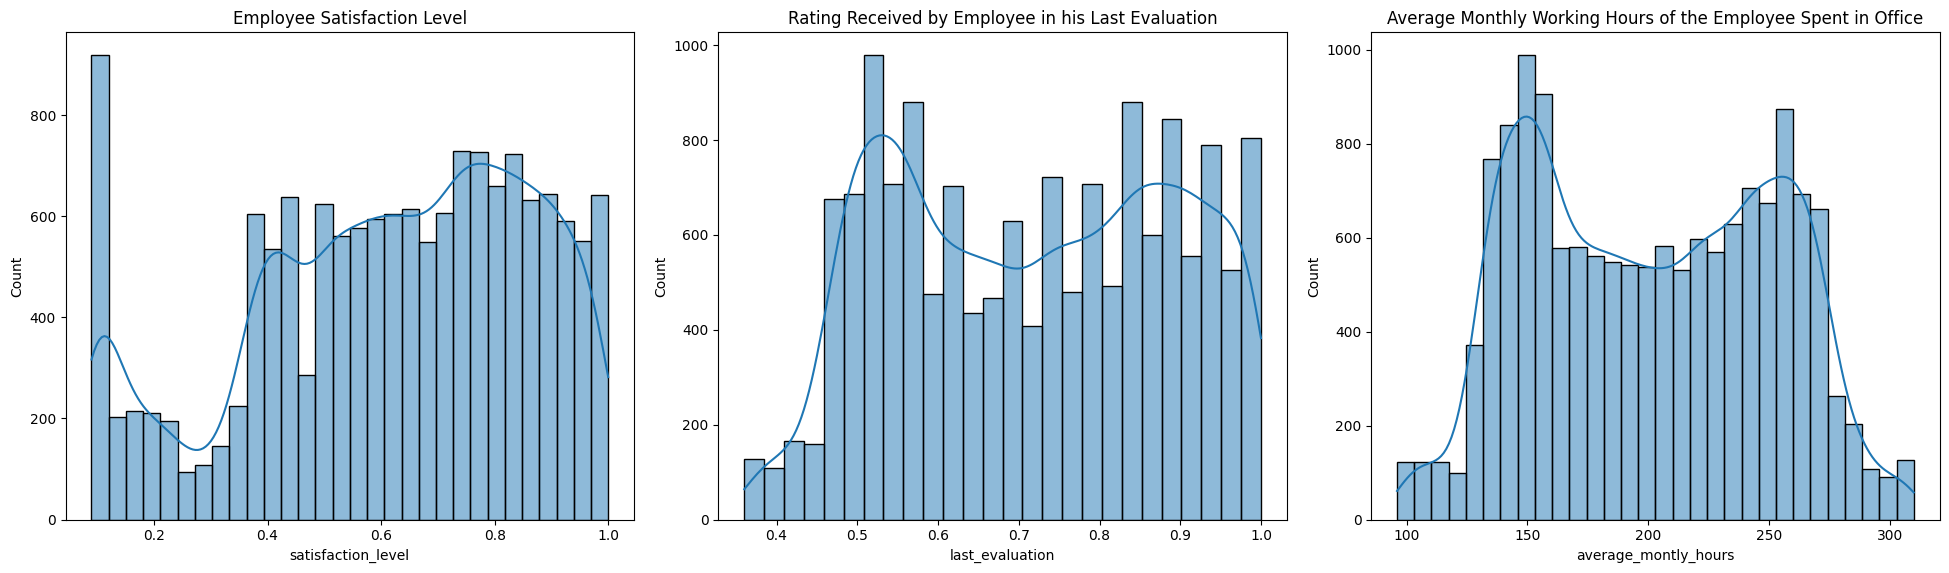

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(20,6))
fig.tight_layout(pad=3)

sns.histplot(df['satisfaction_level'], kde=True, ax=axes[0]).set(title='Employee Satisfaction Level')
sns.histplot(df['last_evaluation'], kde=True, ax=axes[1]).set(title='Rating Received by Employee in his Last Evaluation')
sns.histplot(df['average_montly_hours'], kde=True, ax=axes[2]).set(title='Average Monthly Working Hours of the Employee Spent in Office')
plt.show()

##### 2.3. Draw the bar plot of Employee Project Count of both employees who left and who stayed in the organization (use column number_project and hue column left) and give your inferences from the plot.

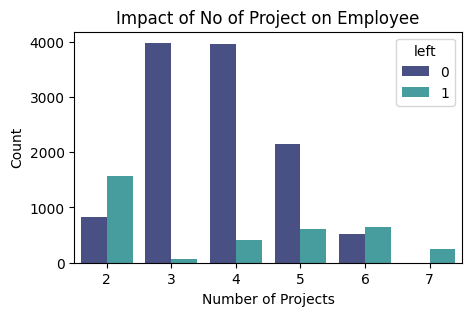

In [9]:
plt.figure(figsize=(5, 3))
sns.countplot(data=df, x='number_project', hue='left', palette="mako").set(title='Impact of No of Project on Employee')
plt.xlabel('Number of Projects')
plt.ylabel('Count')
plt.show()

Inference : 
1. More people left the company when they were assigned 2 or more projects.
2. As no of projects start to increase. No of people who left the company also increased.
3. Data is highly imbalance hence we cannot derive correct inference.

---------------------------------------------------------------------------------------------------------------------------
### Task 3.	Perform clustering of Employees who left based on their satisfaction and evaluation.

##### 3.1.	Choose columns satisfaction_level, last_evaluation and left.
##### 3.2.	Do KMeans clustering of employees who left the company into 3 cluster.
##### 3.3.  Based on the satisfaction and evaluation factors, give your thoughts on the employee clusters.


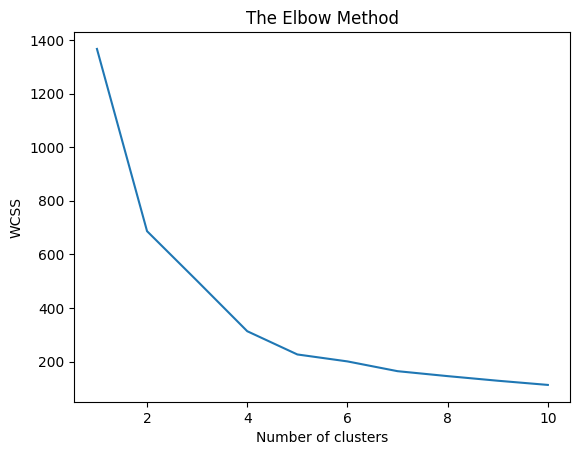

In [10]:
# Using Elbow Method to derive optimal value for K
X = df[['satisfaction_level','last_evaluation']]

wcss = []
for i in range(1, 11):
    model = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    model.fit(X)
    wcss.append(model.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Here Optimal Number of Clusters will be 4 or 5 as we have derived it using Elbow Method.

##### Training the Model with K = 3 as mentioned in the Task.

In [11]:
model = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = model.fit_predict(X)
df['cluster'] = y_kmeans

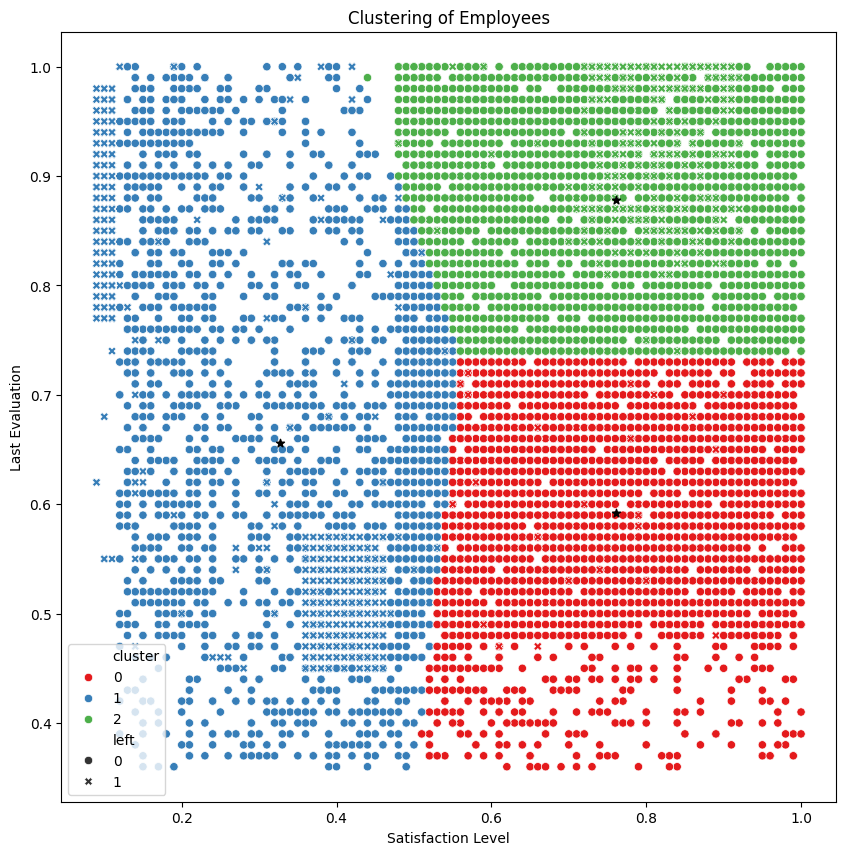

In [12]:
# Visualizing the clusters
plt.figure(figsize=(10, 10))

sns.scatterplot(data=df, x='satisfaction_level', y='last_evaluation', hue='cluster', style='left', palette='Set1')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='black',marker='*',label='centroid')
plt.title('Clustering of Employees')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.show()

#### Using value of K does not give accurate insights of data.

#### As we know using Elbow method best value for K is 5.

#### hence we will use k=5 to create new cluster

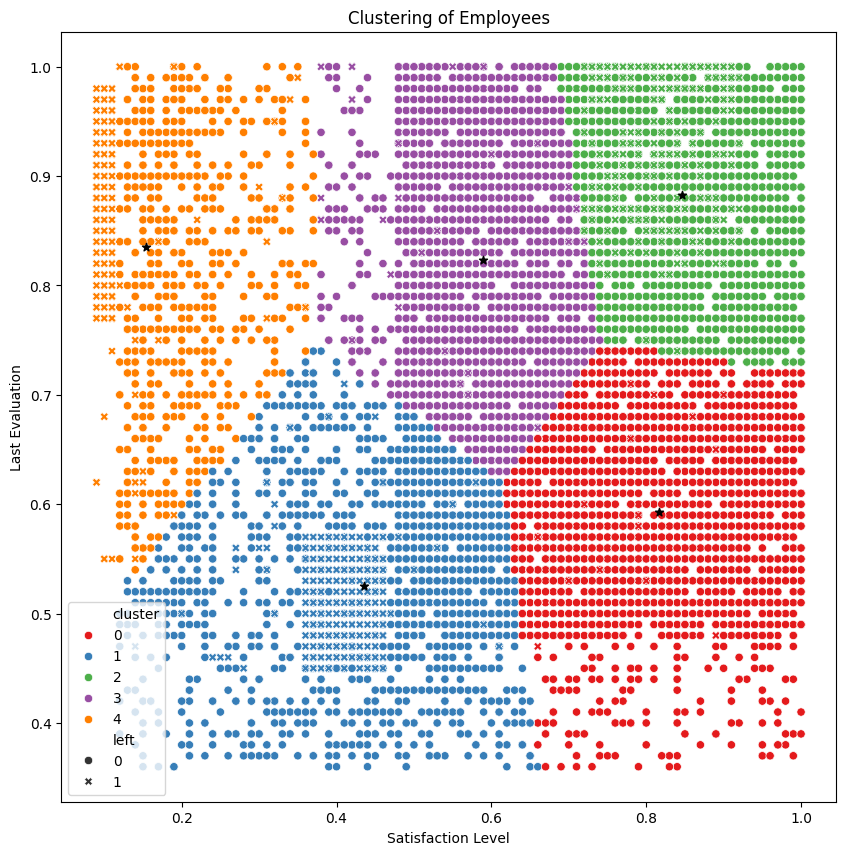

In [13]:
model = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = model.fit_predict(X)
df['cluster'] = y_kmeans

# Visualizing the clusters
plt.figure(figsize=(10, 10))

sns.scatterplot(x='satisfaction_level', y='last_evaluation', hue='cluster', style='left', data=df, palette='Set1')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='black',marker='*',label='centroid')
plt.title('Clustering of Employees')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.show()

Cluster 0 - This Cluster is of employee who had highest satisfaction and received low to medium values as evaluation score in last review. Very Less people left the company from this group.

Cluster 1 - This Cluster is of employee who had lowest satisfaction and received low to medium values as evaluation score in last review. Large no of people left the company from this group.

Cluster 2 - This Cluster is of employee who had highest satisfaction and received mid to high values as evaluation score in last review. Large no of people left the company from this group. 

cluster 3 - This Cluster is of employee who had medium satisfaction and received mid to high values as evaluation score in last review. Very Less people left the company from this group. 

cluster 4 - This Cluster is of employee who had least satisfaction and received mid to high values as evaluation score in last review. significant amount of people left the company from this group. 

---------------------------------------------------------------------------------------------------------------------------
### Task 4.	Handle the left Class Imbalance using SMOTE technique.

#### 4.1.	Pre-Process the data by converting categorical columns to numerical columns by
Separating categorical variables and numeric variables.\
Applying get_dummies() to the categorical variables.\
Combining categorical variables and numeric variables.
ule.


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
 10  cluster                14999 non-null  int32  
dtypes: float64(2), int32(1), int64(6), object(2)
memory usage: 1.2+ MB


In [15]:
df_dummy = pd.get_dummies(df[['sales', 'salary']], dtype='int64')
df = pd.concat([df, df_dummy], axis =1)
df = df.drop(['sales', 'salary'], axis =1)
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,cluster,sales_IT,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,2,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,4,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,2,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,1,0,...,0,0,0,0,0,1,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,1,0,...,0,0,0,0,0,1,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,1,0,...,0,0,0,0,0,1,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,4,0,...,0,0,0,0,0,1,0,0,1,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   cluster                14999 non-null  int32  
 9   sales_IT               14999 non-null  int64  
 10  sales_RandD            14999 non-null  int64  
 11  sales_accounting       14999 non-null  int64  
 12  sales_hr               14999 non-null  int64  
 13  sales_management       14999 non-null  int64  
 14  sales_marketing        14999 non-null  int64  
 15  sa

#### 4.2.	Upsample the train dataset using SMOTE technique from the imblearn module.

In [17]:
feature_df= df.drop(['left'], axis=1)
labels_df = df.left
feature_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,cluster,sales_IT,sales_RandD,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,2,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,4,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,2,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [18]:
oversample = SMOTE()
transformed_feature_df, transformed_label_df = oversample.fit_resample(feature_df, labels_df)

In [19]:
print(f'new label count: {transformed_label_df.value_counts()}')
print(f'old label count: {df.left.value_counts()}')

new label count: left
1    11428
0    11428
Name: count, dtype: int64
old label count: left
0    11428
1     3571
Name: count, dtype: int64


#### 4.3.	Do the stratified split of the dataset to train and test in the ratio 80:20 with random_state=123.

In [20]:
X, Test_X, y, Test_y = train_test_split(transformed_feature_df, transformed_label_df, test_size=0.20, random_state=123)

---------------------------------------------------------------------------------------------------------------------------
### Task 5.	Perform 5-Fold cross-validation model training and evaluate performance. 

##### 5.1.	Train a Logistic Regression model and apply a 5-Fold CV and plot the classification report..


In [84]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, solver='liblinear')

# Initialize KFold with 5 splits
kf = KFold(n_splits=5)

# Lists to store true and predicted labels from each fold
true_labels_LR = []
predicted_labels_LR = []

# Perform KFold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the model on the training data
    log_reg.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = log_reg.predict(X_test)
    
    # Append true and predicted labels
    true_labels_LR.extend(y_test)
    predicted_labels_LR.extend(y_pred)

# Generate classification report
print(classification_report(true_labels_LR, predicted_labels_LR))


              precision    recall  f1-score   support

           0       0.83      0.80      0.81      9119
           1       0.81      0.84      0.82      9165

    accuracy                           0.82     18284
   macro avg       0.82      0.82      0.82     18284
weighted avg       0.82      0.82      0.82     18284



__Observations:__

- The accuracy is 0.82.
- Precision and recall do not have much difference between them.

##### 5.2.	Train a Random Forest Classifier model and apply the 5-Fold CV and plot the classification report.

In [47]:
# Initialize the Random Forest Classifier model
rf_classifier = RandomForestClassifier()

# Initialize KFold with 5 splits
kf = KFold(n_splits=5)

# Lists to store true and predicted labels from each fold
true_labels_RF = []
predicted_labels_RF = []

# Perform KFold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the model on the training data
    rf_classifier.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = rf_classifier.predict(X_test)
    
    # Append true and predicted labels
    true_labels_RF.extend(y_test)
    predicted_labels_RF.extend(y_pred)

# Generate classification report
print(classification_report(true_labels_RF, predicted_labels_RF))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      9119
           1       1.00      0.98      0.99      9165

    accuracy                           0.99     18284
   macro avg       0.99      0.99      0.99     18284
weighted avg       0.99      0.99      0.99     18284



__Observations:__

- The accuracy is 0.99.
- This algorithm performs better than Logistic Regression

##### 5.3.	Train a  Gradient Boosting Classifier model and apply the 5-Fold CV and plot the classification report.

In [83]:
# Initialize the Gradient Boosting Classifier model
gb_classifier = GradientBoostingClassifier()

# Initialize KFold with 5 splits
kf = KFold(n_splits=5)

# Lists to store true and predicted labels from each fold
true_labels_GB = []
predicted_labels_GB = []

# Perform KFold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the model on the training data
    gb_classifier.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = gb_classifier.predict(X_test)
    
    # Append true and predicted labels
    true_labels_GB.extend(y_test)
    predicted_labels_GB.extend(y_pred)

# Generate classification report
print(classification_report(true_labels_GB, predicted_labels_GB))


              precision    recall  f1-score   support

           0       0.95      0.98      0.96      9119
           1       0.98      0.94      0.96      9165

    accuracy                           0.96     18284
   macro avg       0.96      0.96      0.96     18284
weighted avg       0.96      0.96      0.96     18284



__Observations:__

- The accuracy is 0.96.
- This algorithm performs better than Logistic Regression

---------------------------------------------------------------------------------------------------------------------------
### Task 6.	Identify the best model and justify the evaluation metrics used.

6.1.	Find the ROC/AUC for each model and plot the ROC curve.\
6.2.	Find the confusion matrix for each of the models.\
6.3.	From the confusion matrix, explain which metric needs to be used- Recall or Precision?


__Observations:__

- From above examples Random Forest Alogrithm is the best



ROC AUC Score for Logistic Regression Alogrithm is :  0.8183
ROC AUC Score for Gradient Boosting Alogrithm is :  0.9606
ROC AUC Score for Random Forest Alogrithm is :  0.987




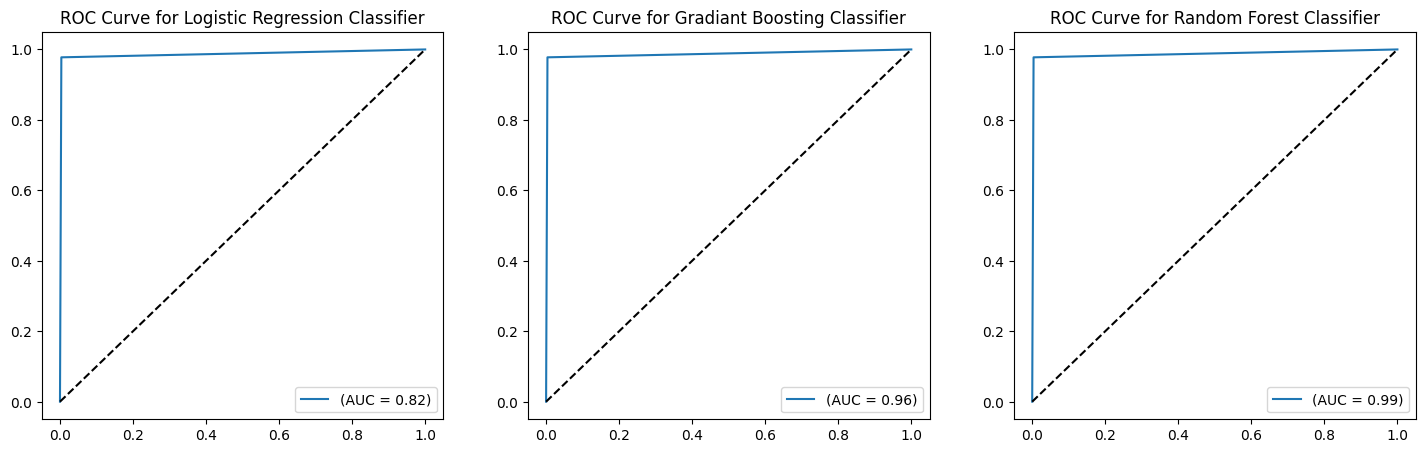

In [129]:
# Calculate ROC/AUC
auc_score_RF = roc_auc_score(true_labels_RF, predicted_labels_RF)
auc_score_LR = roc_auc_score(true_labels_LR, predicted_labels_LR)
auc_score_GB = roc_auc_score(true_labels_GB, predicted_labels_GB)

print("\n")
print("ROC AUC Score for Logistic Regression Alogrithm is : ", auc_score_LR.round(4))
print("ROC AUC Score for Gradient Boosting Alogrithm is : ", auc_score_GB.round(4))
print("ROC AUC Score for Random Forest Alogrithm is : ", auc_score_RF.round(4))
print("\n")

# ROC AUC Scores and Plots for all 3 models
fpr_RF, tprRF, thresholds_RF = roc_curve(true_labels_RF, predicted_labels_RF)
fpr_LR, tprLR, thresholds_LR = roc_curve(true_labels_RF, predicted_labels_RF)
fpr_GB, tprGB, thresholds_GB = roc_curve(true_labels_RF, predicted_labels_RF)

fig, axes = plt.subplots(1, 3, figsize=(15,5))
fig.tight_layout(pad=3)

sns.lineplot(x=fpr_LR, y=tprLR, label='(AUC = {:.2f})'.format(auc_score_LR), ax=axes[0]).set(title='ROC Curve for Logistic Regression Classifier')
sns.lineplot(x=[0, 1], y=[0, 1], ax=axes[0], linestyle='dashed', color='black')
sns.lineplot(x=fpr_GB, y=tprGB, label='(AUC = {:.2f})'.format(auc_score_GB), ax=axes[1]).set(title='ROC Curve for Gradiant Boosting Classifier')
sns.lineplot(x=[0, 1], y=[0, 1], ax=axes[1], linestyle='dashed', color='black')
sns.lineplot(x=fpr_RF, y=tprRF, label='(AUC = {:.2f})'.format(auc_score_RF), ax=axes[2]).set(title='ROC Curve for Random Forest Classifier')
sns.lineplot(x=[0, 1], y=[0, 1], ax=axes[2], linestyle='dashed', color='black')

plt.show()

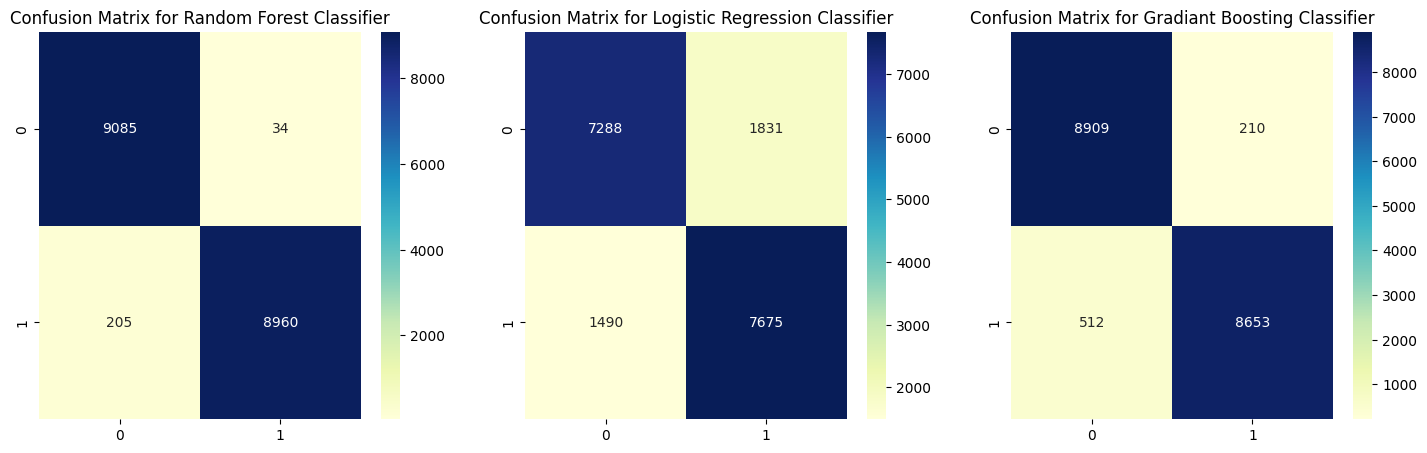

In [105]:
# Generate confusion matrix
conf_matrix_RF = confusion_matrix(true_labels_RF, predicted_labels_RF)
conf_matrix_logReg = confusion_matrix(true_labels_LR, predicted_labels_LR)
conf_matrix_GradBoost = confusion_matrix(true_labels_GB, predicted_labels_GB)

fig, axes = plt.subplots(1, 3, figsize=(15,5))
fig.tight_layout(pad=3)

# Plot confusion matrix
sns.heatmap(conf_matrix_RF, annot=True, cmap="YlGnBu", fmt='d', ax=axes[0]).set(title='Confusion Matrix for Random Forest Classifier')
sns.heatmap(conf_matrix_logReg, annot=True, cmap="YlGnBu", fmt='d', ax=axes[1]).set(title='Confusion Matrix for Logistic Regression Classifier')
sns.heatmap(conf_matrix_GradBoost, annot=True, cmap="YlGnBu", fmt='d', ax=axes[2]).set(title='Confusion Matrix for Gradiant Boosting Classifier')
plt.show()

---------------------------------------------------------------------------------------------------------------------------
### Task 7.	Suggest various retention strategies for targeted employees.

7.1.	Using the best model, predict the probability of employee turnover in the test data. \
7.2.	Based on the below probability score range, categorize the employees into four zones and suggest your thoughts on the retention strategies for each zone.

- Safe Zone (Green) (Score < 20%)
- Low Risk Zone (Yellow) (20% < Score < 60%)
- Medium Risk Zone (Orange) (60% < Score < 90%)
- High Risk Zone (Red) (Score > 90%).


In [134]:
# Predict probabilities on the test data
probabilities = rf_classifier.predict_proba(Test_X)
employee_turnover_probabilities = probabilities[:, 1]

# Print the predicted probabilities
print("Predicted probabilities of employee turnover:", employee_turnover_probabilities)


Predicted probabilities of employee turnover: [0.97 1.   1.   ... 1.   0.08 1.  ]


In [137]:
zones = []
for prob in employee_turnover_probabilities:
    if prob < 0.20:
        zones.append("Safe Zone (Green)")
    elif 0.20 <= prob < 0.60:
        zones.append("Low Risk Zone (Yellow)")
    elif 0.60 <= prob < 0.90:
        zones.append("Medium Risk Zone (Orange)")
    else:
        zones.append("High Risk Zone (Red)")

# Print the zones for each employee
for i, zone in enumerate(zones):
    print(f"Employee {i+1}: {zone}")

Employee 1: High Risk Zone (Red)
Employee 2: High Risk Zone (Red)
Employee 3: High Risk Zone (Red)
Employee 4: High Risk Zone (Red)
Employee 5: Safe Zone (Green)
Employee 6: Safe Zone (Green)
Employee 7: High Risk Zone (Red)
Employee 8: High Risk Zone (Red)
Employee 9: High Risk Zone (Red)
Employee 10: High Risk Zone (Red)
Employee 11: Safe Zone (Green)
Employee 12: High Risk Zone (Red)
Employee 13: High Risk Zone (Red)
Employee 14: High Risk Zone (Red)
Employee 15: Safe Zone (Green)
Employee 16: Safe Zone (Green)
Employee 17: Safe Zone (Green)
Employee 18: High Risk Zone (Red)
Employee 19: High Risk Zone (Red)
Employee 20: Safe Zone (Green)
Employee 21: Safe Zone (Green)
Employee 22: High Risk Zone (Red)
Employee 23: High Risk Zone (Red)
Employee 24: High Risk Zone (Red)
Employee 25: High Risk Zone (Red)
Employee 26: High Risk Zone (Red)
Employee 27: High Risk Zone (Red)
Employee 28: Safe Zone (Green)
Employee 29: Safe Zone (Green)
Employee 30: Safe Zone (Green)
Employee 31: Safe Zone

#### Retention strategies for each zone
- Green zone: Focus on maintaining high job satisfaction and engagement levels. Recognize and reward achievements, and offer opportunities for career growth.
- Yellow zone: Monitor these employees closely and provide additional support or resources if needed. Address any concerns or dissatisfaction to prevent potential attrition.
- Orange zone: Implement targeted interventions such as personalized development plans or mentorship programs. Identify and address root causes of dissatisfaction to mitigate the risk of turnover.
- Red zone: Prioritize immediate action to retain these employees. Conduct exit interviews to understand reasons for dissatisfaction and offer attractive retention incentives.